# FORESEE - ALP with photon couplings

### Load Libraries 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import sys
import os
from matplotlib import pyplot as plt

#src_path = "/Users/felixkling/Documents/GitHub/FORESEE/"
src_path = "/Users/abraham/Documents/GitHub/roshanFORESEE/"

sys.path.append(src_path)
from src.foresee import Foresee, Utility, Model

/Users/abraham/Documents/GitHub/roshanFORESEE/src/foresee.py:597: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def boostlist(arr_particle, arr_boost):


## 1. Initialization 

All function that we will need are included in the FORESEE package. We start by simply initializing it: 

In [3]:
foresee = Foresee(path=src_path)

## 2. Specifying the Model: ALP-Photon

The phenomenology of the ALP with $\gamma$-couplings can be described by the following Lagrangian

\begin{equation}
 \mathcal{L} = - \frac{1}{2} m_{a}^2 a^2  - \frac{g}{4}a F^a_{\mu\nu} \tilde F^a_{\mu\nu}
\end{equation}

with the ALP mass $a$ and the coupling parameter $g$ as free parameters. For the search for ALPS at forward experiments we need to know i) the *production rate*, ii) the *lifetime* and iii) possibly the *decay branching fractions* of dark photons as function of those two parameters. All properties are specified in the `Model` class. We initialize it with the name of the model as argument. 

In [4]:
energy = "13.6"
modelname = "ALP-photon"
model = Model(modelname)

**Production** The Dark Higgs is mainly produced via the Primakoff Process. Following [1806.02348](https://arxiv.org/pdf/1806.02348.pdf) Eq (6), the Primakoff cross section is given by
\begin{equation}
 \frac{d\sigma}{d\log\theta } 
 = \theta \frac{d\sigma}{d\log\theta} = g^2 \frac{\alpha Z^2}{4} \times F(t)^2 \times \frac{p_a^4 \theta^4}{t^2}
\end{equation}
where $p_a \approx E_\gamma$, $t = m_a^4 / (2E_\gamma^2) + E_\gamma^2 \theta^2$ and the form factor is given by $F(t) = a^2t/(1+a^2t)$ for $t<7.39m_e^2$ and $F(t) = 1/(1+t/d)$ for $t>7.39m_e^2$. 

We have obtained the ALP spectra and saved them as `model/direct`. See also the separate notebook contaning the code in the same folder. We now load the spectra via the `model.add_production_direct()` function. 

In [14]:
masses = [float(x) for x in ['{:0.4e}'.format(m) for m in np.logspace(-2,0,20+1)]]

model.add_production_direct(
    label = "Prim",
    energy = energy,
    coupling_ref=1,
    masses=masses,
    generator=['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8-Forward'],
    #generator="EPOSLHC",
)

Particles can also be produced directly in collisions or via mixing with SM particles. However, we will not use this in this example. 

**Lifetime:** For most models the lifetime can be written as $\ c\tau(m,g)\  =\  c\tau(m,g_*) \ \cdot\  g_*^2 \ / \ g^{2}$ where $m$ is the mass, $g$ is the coupling and $g_*$ is some reference coupling. In this case, we can provide a table of masses $m$ and lifetimes $c\tau(m,g_*)$ at a reference coupling $g_*$ using `model.set_ctau_1d`. Alternatively, one can also provide a table of masses $m$, couplings $g$ and lifetimes $c\tau(m,g)$ via `model.set_ctau_2d()`. 

In [6]:
model.set_ctau_1d(
    filename="model/ctau.txt", 
    coupling_ref=1
)

**Branching Fractions:** For most models, the branching fractions into particular decay channels are independent of the overall couplings. In this case, we can provide a set of tables of masses $m$ and branching fractions $BR(m)$ using `model.set_br_1d`. Alternatively, we can also provide table of masses $m$, couplings $g$ and brnaching fraction $BR(m,g)$ via `model.set_br_2d()`. In both cases, we need to specify a list of decay modes and a list of filenames with the corresponding data tables. 

In [7]:
branchings = [
    ["gamma"     , "black"        , "solid" , r"$\gamma\gamma$"         , 0.110, 0.50],
    ["eegamma"   , "red"          , "solid" , r"$ee\gamma$"             , 0.225, 0.03],
]

model.set_br_1d(
    modes=[channel for channel,_,_,_,_,_ in branchings],
    finalstates=[[22,22], [11,-11, 22]],
    filenames=["model/br/"+channel+".txt" for channel,_,_,_,_,_ in branchings],
)

## 3. Generate LLP Spectra

After we have specified the model, let us generate the LLP spectra. We first set the model we just created. 

In [8]:
foresee.set_model(model=model)

Let's first look at one benchmark scenario with $m_{a}=0.1$ GeV and $g=10^{-4}$ using the function `foresee.get_llp_spectrum()`. 

In [9]:
plt = foresee.get_llp_spectrum(mass=1.0, coupling=1e-04, do_plot=True, save_file=True)
#plt.savefig("figures/"+modelname+"_llp_spectrum_eposlhc.pdf")
plt.show()

did not find file: ['./model/direct/13.6TeV/Pythia8-Forward/Pythia8-Forward_Prim_13.6TeV_1.0.txt', './model/direct/13.6TeV/EPOSLHC/EPOSLHC_Prim_13.6TeV_1.0.txt', './model/direct/13.6TeV/SIBYLL/SIBYLL_Prim_13.6TeV_1.0.txt', './model/direct/13.6TeV/QGSJET/QGSJET_Prim_13.6TeV_1.0.txt'] or ['./model/direct/13.6TeV/Pythia8-Forward/Pythia8-Forward_Prim_13.6TeV_10000000000.0.txt', './model/direct/13.6TeV/EPOSLHC/EPOSLHC_Prim_13.6TeV_10000000000.0.txt', './model/direct/13.6TeV/SIBYLL/SIBYLL_Prim_13.6TeV_10000000000.0.txt', './model/direct/13.6TeV/QGSJET/QGSJET_Prim_13.6TeV_10000000000.0.txt']


ValueError: Invalid vmin or vmax

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1695f01f0> (for post_execute):


ValueError: Invalid vmin or vmax

ValueError: Invalid vmin or vmax

<Figure size 504x396 with 2 Axes>

We can now produce a set of LLP spectra for various masses and unit coupling and save them.  

In [10]:
#masses = np.concatenate((np.logspace(-7,-2,25+1),np.logspace(-2,0,40+1)))
for mass in masses:
    foresee.get_llp_spectrum(mass=mass,coupling=1)

save data to file: ./model/LLP_spectra/13.6TeV_Prim_Pythia8-Forward_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_Prim_EPOSLHC_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_Prim_SIBYLL_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_Prim_QGSJET_m_0.01.npy
save data to file: ./model/LLP_spectra/13.6TeV_Prim_Pythia8-Forward_m_0.012589.npy
save data to file: ./model/LLP_spectra/13.6TeV_Prim_EPOSLHC_m_0.012589.npy
save data to file: ./model/LLP_spectra/13.6TeV_Prim_SIBYLL_m_0.012589.npy
save data to file: ./model/LLP_spectra/13.6TeV_Prim_QGSJET_m_0.012589.npy
save data to file: ./model/LLP_spectra/13.6TeV_Prim_Pythia8-Forward_m_0.015849.npy
save data to file: ./model/LLP_spectra/13.6TeV_Prim_EPOSLHC_m_0.015849.npy
save data to file: ./model/LLP_spectra/13.6TeV_Prim_SIBYLL_m_0.015849.npy
save data to file: ./model/LLP_spectra/13.6TeV_Prim_QGSJET_m_0.015849.npy
save data to file: ./model/LLP_spectra/13.6TeV_Prim_Pythia8-Forward_m_0.019953.npy
save data to fi

We can now plot the `production rate vs mass` using the `foresee.plot_production()` function.

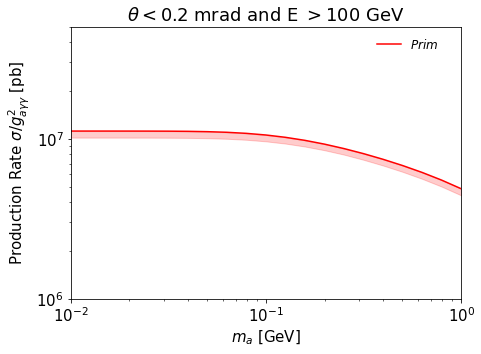

In [16]:
productions=[
    #{"channels": ["111"], "color": "red", "label": r"$\pi^0 \to \gamma A'$", "generators": ["EPOSLHC","QGSJET","SIBYLL"]},
    #{"channels": ["221"], "color": "orange", "label": r"$\eta \to \gamma A'$", "generators": ["EPOSLHC","QGSJET","SIBYLL"]},
    #{"channels": ["Brem"], "color": "limegreen", "label": r"Brem", "generators": ["p.pt<1", "p.pt<2", "p.pt<0.5"]},
    {"channels": ["Prim"], "color": "red", "label": r"$Prim$", "generators": ['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8-Forward']},

]

plot=foresee.plot_production(
    masses = masses,
    productions = productions,
    energy=energy,
    condition="logth<-3.7 and logp>2",  
    xlims=[0.01,1],
    ylims=[1e6,5e7],
    xlabel=r"$m_a$ [GeV]",
    ylabel=r"Production Rate $\sigma/g_{a\gamma\gamma}^2$ [pb]",
    legendloc=(0.97,1),
    fs_label=12,
    ncol=3,
)

plot.title(r"$\theta < 0.2$ mrad and E $> 100$ GeV")
plot.savefig("figures/"+modelname+"_production_channels_E100.pdf")

## 4. Count Eventrate in Detector

Before counting the number of decays within the detector volume, let us specify the detector geometry. Here we use the default for 2022+2023 data. 

In [12]:
distance, selection, length, luminosity, channels = 476, "np.sqrt(x.x**2 + (x.y+0.065)**2)<.1", 3.5, 60, None
foresee.set_detector(distance=distance, selection=selection, length=length, luminosity=luminosity, channels=channels)

Let us look for one specific dark photon mass $m_{A'}=50$ MeV and $\epsilon=3\cdot 10^{-5}$ at how many particle decay inside the decay volume. The list `setups` defines three seups, with corresponding generators (for piopns and eta) and pT cuts (for Brem) specified in `modes`. 

In [13]:
setups = ["Pythia8-Forward","EPOSLHC","QGSJET","SIBYLL"]
modes = {'Prim': ["Pythia8-Forward","EPOSLHC","QGSJET","SIBYLL"]}
output = foresee.get_events(mass=0.05, energy=energy, couplings=[5e-5], modes=modes)
coups, ctaus, nsigs, momenta, weights = output
for coup,ctau,nsig in zip(coups, ctaus, nsigs):
    for i in range(len(nsig)): 
        print ("coupling =", '{:5.3e}'.format(coup), setups[i], ": nsignal =", '{:5.3e}'.format(nsig[i]))

coupling = 5.000e-05 Pythia8-Forward : nsignal = 2.772e+00
coupling = 5.000e-05 EPOSLHC : nsignal = 2.941e+00
coupling = 5.000e-05 QGSJET : nsignal = 2.759e+00
coupling = 5.000e-05 SIBYLL : nsignal = 2.578e+00


The previous function also outputs the energy distribution of the ALPs which decay inside the detector. Let's have a look at them.

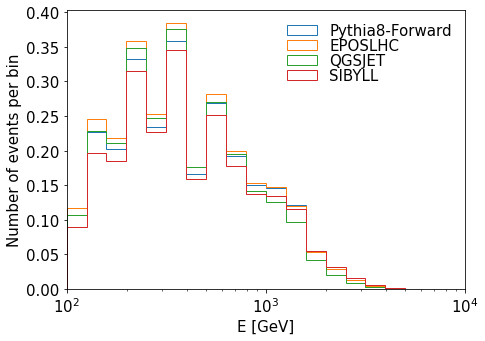

In [16]:
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(1,1,1)
for coup,momentum,weight in zip(coups,momenta,weights):
    for w,label in zip(np.array(weight).T, setups):
        ax.hist([p.e for p in momentum], weights=w, bins=np.logspace(2,4, 20+1), histtype='step', label=label) 
    ax.set_xscale("log")
    ax.set_xlim(1e2,1e4) 
    ax.set_xlabel("E [GeV]") 
    ax.set_ylabel("Number of events per bin") 
    ax.legend(frameon=False, labelspacing=0, loc='upper right')
plt.tight_layout()

plt.show()

## 5. Parameter Scan

To get a sensitivity curve, we need to perform a paramerer scan loop over different masses and use the previously introduced funtion `get_events`. The results will be written into a `.npy` file that we can store and plot later. Note that there are multiple files for different generators (this might be changed in the future). 

Note: ALPs are primarilly produced at the TAN, which is located at z=140m. Therefore we adjust the `distance` $L \to L-L_{TAN}$ and $R \to R \times (L-L_{TAN}) / L$ to account for the ALP production at z=140m. 

In [18]:
#specify setup

luminosity, distance, length = 60 , 476-140, 3.5
setup, selection, channels = "default", "np.sqrt(x.x**2 + (x.y+0.065)**2)< .1*(476.-140.)/476.", None
foresee.set_detector(length=length, selection=selection, channels=channels, distance=distance, 
                     luminosity=luminosity)


#define setups and modes
setups = ["Pythia8-Forward","EPOSLHC","QGSJET","SIBYLL"]
modes = {'Prim': ["Pythia8-Forward","EPOSLHC","QGSJET","SIBYLL"]}

#get reach  
list_nevents = {label:[] for label in setups}
for mass in masses:
    couplings, _, nevents, _, _  = foresee.get_events(mass=mass, energy=energy, 
        couplings = np.logspace(-8,3,101),modes=modes)
    for i,label in enumerate(setups): list_nevents[label].append(nevents.T[i])  
        
#save results
for label in setups: 
    np.save("model/results/"+energy+"TeV_"+setup+"_"+label+".npy",[masses,couplings,list_nevents[label]])


/Users/abraham/.pyenv/versions/3.10.5/lib/python3.10/site-packages/numpy/lib/npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


## 6. Plot the Results

Now let's plot the results. We first specify all detector setups for which we want to show result (filename in model/results directory, label, color, linestyle, opacity alpha for filled contours, required number of events).

In [45]:
setups = [ 
     ["13.6TeV_default_EPOSLHC.npy",  "EPOSLHC"    , "sienna"        ,  "solid"  , 0., 3],
     ["13.6TeV_default_SIBYLL.npy" ,  "SYBILL"  , "tomato"    ,  "dotted"  , 0., 3],
     ["13.6TeV_default_QGSJET.npy" ,"QGSJET", "maroon"     ,  "dashed"  , 0., 3],
     ["13.6TeV_default_Pythia8-Forward.npy" ,"Pythia8-Forward", "rosybrown"     ,  "dashdot"  , 0., 3],

]

# setups = [ 
#      ["13.6TeV_default_EPOSLHC.npy",  "EPOSLHC"    , "sienna"        ,  "solid"  , 0., 3],
#      ["13.6TeV_default_SIBYLL.npy" ,  "SYBILL"  , "tomato"    ,  "solid"  , 0., 3],
#      ["13.6TeV_default_QGSJET.npy" ,"QGSJET", "maroon"     ,  "solid"  , 0., 3],
#      ["13.6TeV_default_Pythia8-Forward.npy" ,"Pythia8-Forward", "rosybrown"     ,  "solid"  , 0., 3],

# ]

Then we specify all the existing bounds (filename in model/bounds directory, label, label position x, label position y, label rotation). Constraints from E137, E141, CHARM, LEP, SN1987, NuCal from [1901.09966](https://arxiv.org/pdf/1901.09966.pdf), NA64 from [2005.02710](https://arxiv.org/pdf/2005.02710.pdf), PrimEx from [1903.03586](https://arxiv.org/pdf/1903.03586.pdf) and Belle2 from [2007.13071](https://arxiv.org/abs/2007.13071).

In [18]:
bounds = [ 
    ["bounds_BESIII.txt", "BESIII"  , 0.210, 0.55*10**-3, 0],        
    ["bounds_Belle2.txt", "Belle2"  , 0.210, 1.5*10**-3, 0 ],
    ["bounds_PrimEx.txt", "PrimEx"  , 0.126, 1.2*10**-3, 90 ],
    ["bounds_LEP.txt"   , "LEP"     , 0.080, 6.0*10**-3, 0  ],
    ["bounds_SN1987.txt", "SN1987"  , 0.0105,6.0*10**-7, 0 ],
    ["bounds_E137.txt"  , "E137"    , 2e-2, 6.0*10**-6, 0 ],
    ["bounds_NuCal.txt" , "NuCal"   , 0.080, 5.0*10**-6, -15 ],
    ["bounds_Charm.txt" , "CHARM"   , 0.041, 3.0*10**-5, -45 ],
    ["bounds_NA64.txt"  , "NA64"    , 0.035, 2.6*10**-4, 0 ],
    ["bounds_E141.txt"  , "E141"    , 0.017, 1.7*10**-3, 0 ],
]

We then specify other projected sensitivitities (filename in model/bounds directory, color, label, label position x, label position y, label rotation)

In [19]:
projections = [
    ["limits_SHiP.txt",         "cyan"       ,"SHiP"                 , 0.152, 2.30e-5, -45  ],
    ["limits_SeaQuest.txt",     "teal"       ,"SeaQuest"             , 0.250, 8.00e-6, -48  ],
    ["limits_NA64.txt",         "turquoise"  ,"NA64"                 , 0.2500, 1.0e-4, 0  ],
    ["limits_NA62.txt",         "dodgerblue" ,"NA62"                 , 0.172, 1.0e-5, -45  ],
    ["limits_BelleII_inv.txt",  "blue"       ,r"Belle2 (1$\gamma$) 50ab$^{-1}$"  , 0.065, 1.50*10**-5, -45  ],
    ["limits_BelleII_3a.txt",   "blue"       ,r"Belle2 $3\gamma$"+ "\n" +r"50ab$^{-1}$"  , 0.235, 3.00*10**-5, 0  ],
    ["limits_PrimEX.txt",       "skyblue"    ,"PrimEx"               , 0.06, 0.7*10**-3, 0 ],
    ["limits_GlueX1pb.txt",     "deepskyblue","GlueX"                , 0.25, 2.5e-4, 0 ],
    ["limits_LUXE_NPOD1.txt",   "darkblue"   ,"LUXE NPOD"            , 0.08, 1.0*10**-4, -42],
]


Finally, we can plot everything using `foresee.plot_reach()`. It returns a matplotlib instance, to which we can add further lines and which we can show or save. Below, we add the dark matter relict target line for a specific benchmark.

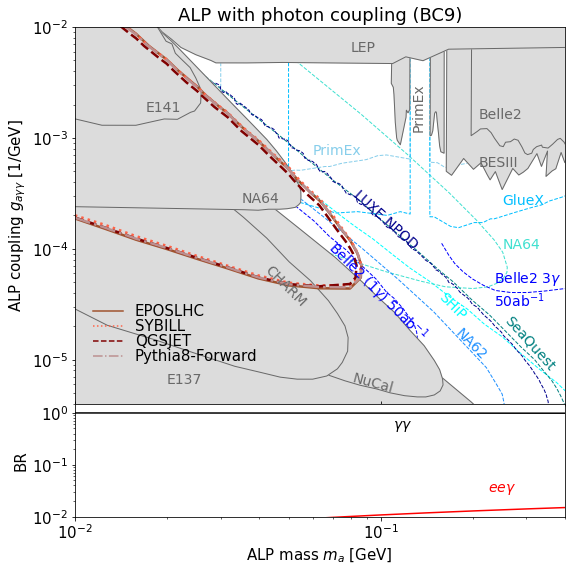

In [47]:
# plot, ax, ax2 = foresee.plot_reach(
#     setups=setups,
#     bounds=bounds,
#     projections=projections,
#     title="ALP with photon coupling", 
#     xlims=[0.01,1], 
#     ylims=[0.5*10**-6,10**-2],
#     xlabel=r"ALP mass $m_{a}$ [GeV]", 
#     ylabel=r"ALP coupling $g_{a\gamma\gamma}$ [1/GeV]",
#     legendloc=(1.00,0.70),
#     branchings=branchings,
#     figsize=(8,8),
# )

# plot.subplots_adjust(left=0.12, right=0.97, bottom=0.10, top=0.95)
# #plot.savefig("/Users/felixkling/Downloads/Figure.pdf")
# plot.show()


plot, ax, ax2 = foresee.plot_reach(
    setups=setups,
    bounds=bounds,
    projections=projections,
    title="ALP with photon coupling (BC9)", 
    linewidths=2.5,
#     xlims=[0.01,1], 
#     ylims=[0.5*10**-6,10**-2],
    xlims=[0.01,4e-1], 
    ylims=[4e-6,1e-2],    
    xlabel=r"ALP mass $m_{a}$ [GeV]", 
    ylabel=r"ALP coupling $g_{a\gamma\gamma}$ [1/GeV]",
    legendloc=(0.4,0.30),
    branchings=branchings,
    figsize=(8,8),
)

plot.subplots_adjust(left=0.12, right=0.97, bottom=0.10, top=0.95)
plot.savefig("figures/"+modelname+".pdf")
plot.show()